# Polynomial Regression

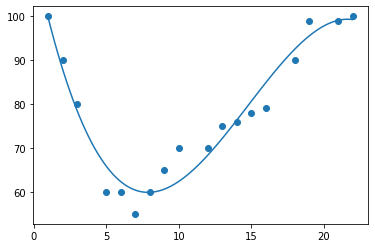

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [2]:
mymodel

poly1d([-3.03208795e-02,  1.34333191e+00, -1.55383039e+01,  1.13768037e+02])

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
X = np.arange(6).reshape(3, 2)

In [5]:
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [6]:
poly = PolynomialFeatures(3)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

# Ridge Regression

In [7]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np

In [8]:
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=25,
    coef=True,
    random_state=1
)

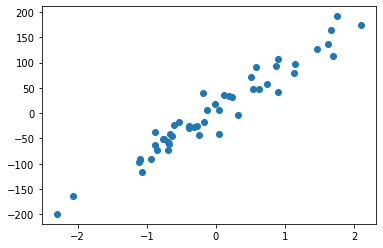

In [9]:
plt.scatter(X, y)

In [10]:
rr = Ridge(alpha=1)
rr.fit(X, y)
w = rr.coef_
w

array([83.16318084])

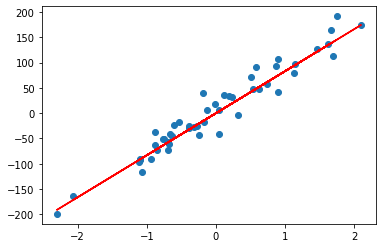

In [11]:
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

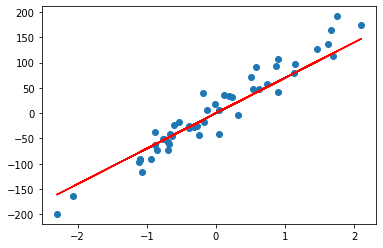

In [12]:
rr = Ridge(alpha=10)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

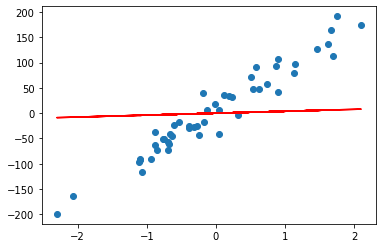

In [13]:
rr = Ridge(alpha=1000)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

In [14]:
rr.coef_

array([3.8130304])

## Implement function
`fit_1d_ridge_regression` that takes two vectors $x$ and $y$ and int lmb, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope using ridge regression matrix form.

In [15]:
def fit_1d_ridge_regression(data_vector, response_vector, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    # makng sure that X and y are np.arrays to avoid errors.
    np_X = np.array(data_vector)
    np_y = np.array(response_vector)
    
    stack_X = np.hstack([np.ones((np_X.shape[0], 1)), np_X])
    tmp_1 = stack_X.T @ stack_X
    li = lmb * np.eye(tmp_1.shape[0])
    tmp_2 = stack_X.T @ np_y
    beta = np.linalg.inv(tmp_1 + li) @ tmp_2
    return beta


In [16]:
w = fit_1d_ridge_regression(X, y, 0.1)

In [17]:
w

array([ 5.44560696, 84.75181687])

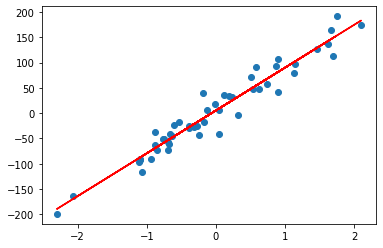

In [18]:
plt.scatter(X, y)
plt.plot(X, w[0]+w[1]*X, c='red')

In [19]:
def fit_1d_lasso_regression(data_vector, response_vector, n_iterations = 1000,learning_rate = 0.1, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """   
    np_X = np.array(data_vector)
    np_y = np.array(response_vector)
    m, n = np_X.shape
    w0 = 1
    penalty = np.abs(np_y).mean()
    loss = []
    theta = np.zeros(n)
    for _ in range(n_iterations):
        y_pred = np_X @ theta + w0
        g_theta = np.zeros(n)
        for j in range(n):
            g_theta[j] = (-(2 * (np_X[:,j]) @ (np_y - y_pred) + np.sign(theta[j])*lmb*penalty))/m
        d_w0 = -2 * np.sum(np_y - y_pred) / m
        theta -= learning_rate * g_theta
        w0 -= learning_rate * d_w0
        curr_cost = 0.5*((np_y - y_pred)**2).sum() + lmb * np.linalg.norm(theta)
        loss.append(curr_cost)
                              
    
    return np.append(w0, theta), loss


In [20]:
w, loss = fit_1d_lasso_regression(X, y, learning_rate=0.01, lmb=1, n_iterations=1000)
w

array([ 5.47995846, 85.67129823])

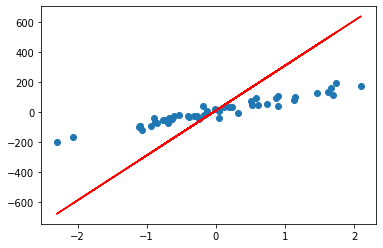

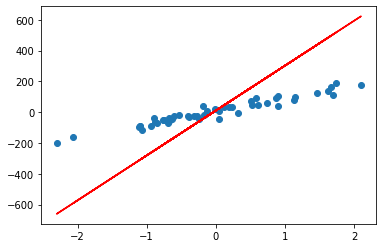

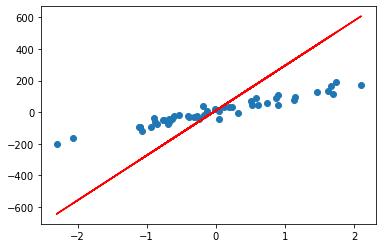

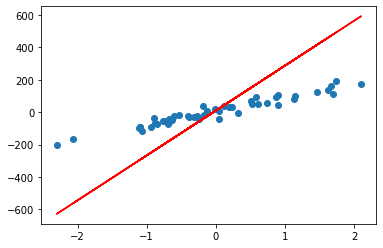

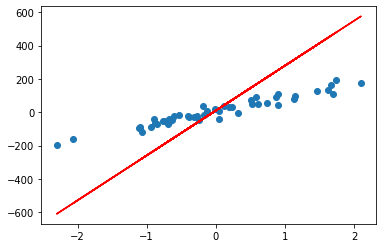

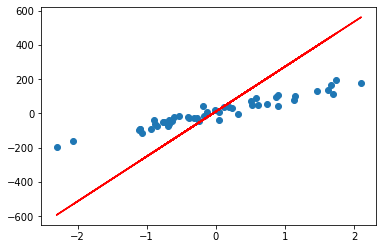

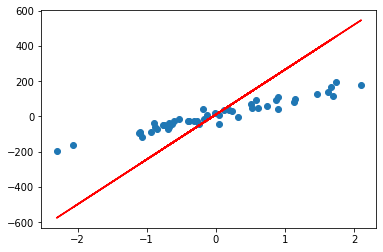

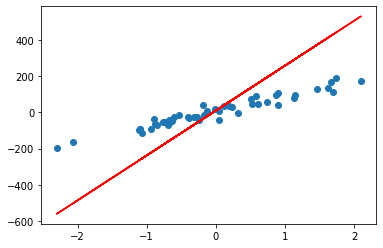

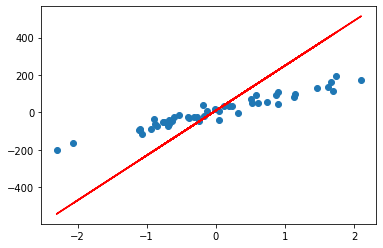

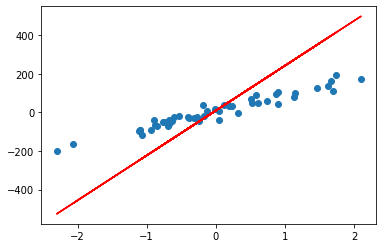

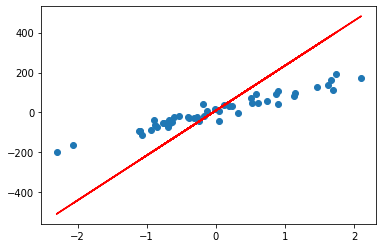

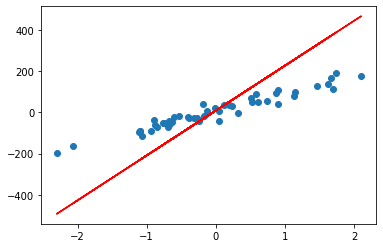

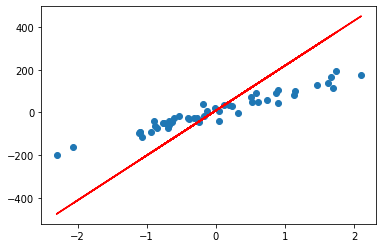

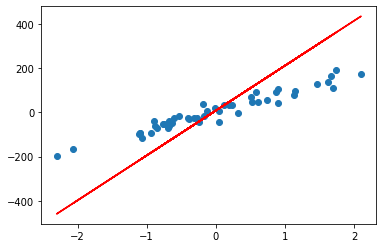

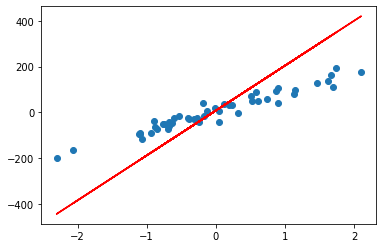

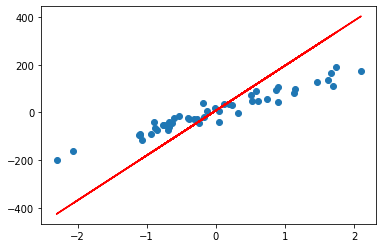

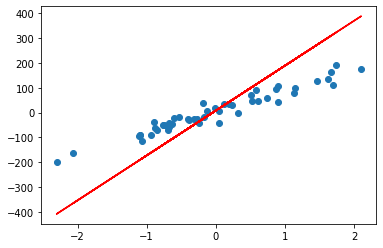

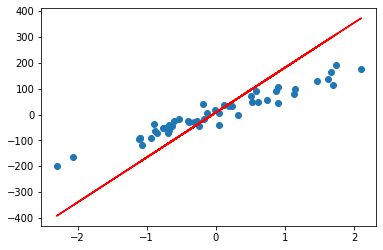

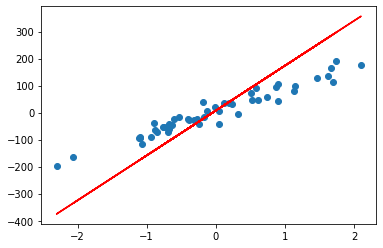

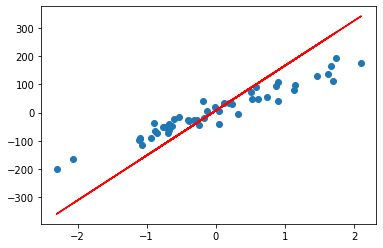

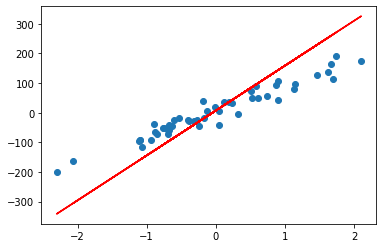

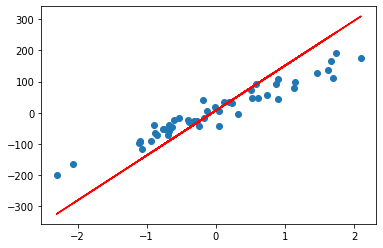

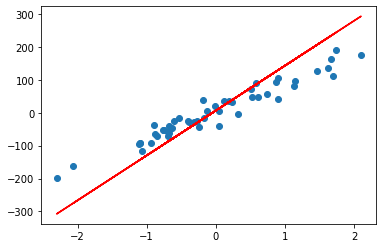

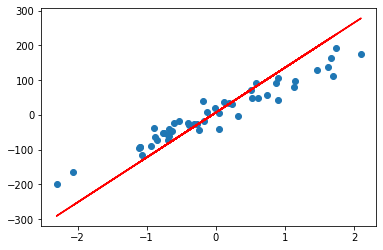

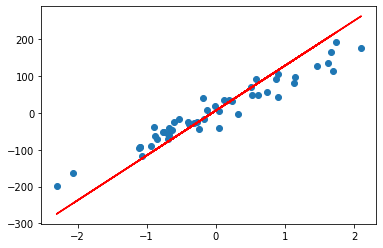

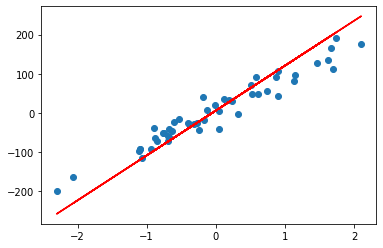

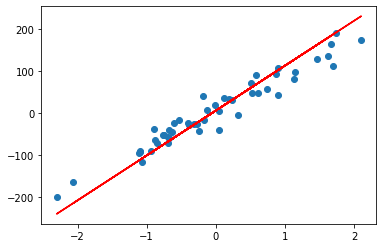

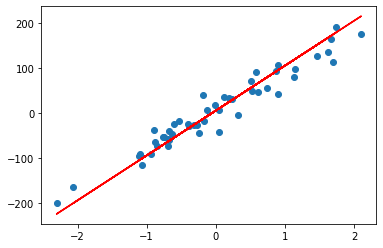

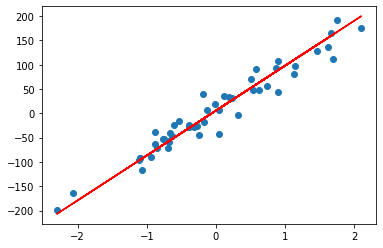

In [21]:
for lmb in range(290, 0, -10):
    w, loss = fit_1d_lasso_regression(X, y, learning_rate=0.01, lmb=lmb)
    plt.scatter(X, y)
    plt.plot(X, w[0]+w[1]*X, c='red')
    plt.show()


## Apply your implemented lasso and ridge regression functions to the data

In [22]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())

(506, 14)
        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [23]:
X_1 = dataframe[dataframe.columns.difference([13])]
y_1 = dataframe[13]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [25]:
X_train = StandardScaler().fit_transform(X_train)

In [26]:
beta = fit_1d_ridge_regression(X_train, y_train)
beta

array([22.74024691, -0.99218679,  0.6777488 ,  0.2522143 ,  0.72248078,
       -1.99083465,  3.15157218, -0.17726162, -3.04502895,  2.17324941,
       -1.69555879, -2.02783351,  1.127197  , -3.59897667])

In [27]:
beta = fit_1d_lasso_regression(X_train, y_train, n_iterations=1000, learning_rate=0.01, lmb=1)
beta[:-1]

(array([22.79653462, -1.0193186 ,  0.693468  ,  0.24334467,  0.7517149 ,
        -2.06817905,  3.19052882, -0.265609  , -3.19101041,  2.01505937,
        -1.46205203, -2.04731683,  1.16040979, -3.59129497]),)

### tunning ridge hyperparametr

In [28]:
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.model_selection import RepeatedKFold
from pandas import read_csv

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.379
Config: {'alpha': 0.51}


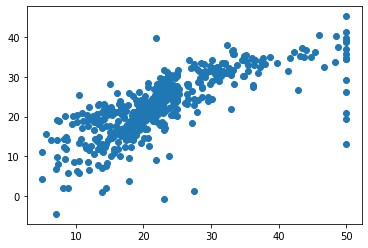

In [29]:
predictions = cross_val_predict(Ridge(alpha=0.51), X, y)
plt.scatter(y, predictions)

## Implement GridSearchCV using numpy 

In [30]:
import numpy as np

# ___Import Everything you need.
# ___For Example:

from sklearn import metrics
from inspect import signature
from itertools import product
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

class MyGridSearchCV:
    
    def __init__(self, estimator, param_grid: dict, scoring='neg_mean_absolute_error', refit=True, cv=None):
        self.estimator = estimator
        self.param_grid = param_grid
        self.scoring = metrics.get_scorer(scoring)
        self.refit = refit
        if cv is None:
            self.cv = KFold()
        else:
            self.cv = cv
            
            # TODO

    def fit(self, X, y):
        X, y = np.array(X), np.array(y)
        score = []
        k = -1
        self._best_params_ = []
        self._best_score_ = []
        for hyper_name, value in self.param_grid.items():
            k+=1
            score.append([])
            for val in value:
                tmp_score = []
                for i, j in self.cv.split(X):
                    X_train, y_train = X[i], y[i]  
                    model = self.estimator.set_params(**{hyper_name:val})
                    fitted = model.fit(X_train, y_train)
                    tmp_score.append(self.scoring(fitted, X_train, y_train))
                score[k].append(np.mean(tmp_score))
            score[k] = np.array(score[k])
            self._best_params_.append(list(self.param_grid.values())[k][np.argmax(score[k])]) 
            self._best_score_.append(np.max(score[k]))
            
        if self.refit:
            par = {hn:vl for hn,vl in zip(self.param_grid.keys(),self._best_score_)}
            self.estimator = self.estimator.set_params(**par)
        return self
        
    def predict(self, X):
        pred = self.estimator.predict(X)
        return pred
        
        
    @property
    def best_score_(self):
        if len(self._best_score_) == 1:
            return self._best_score_[0]
        return self._best_score_
    
    @property
    def best_params_(self):
        if len(self._best_params_) == 1:
            return self._best_params_[0]
        return self._best_params_
    

In [31]:
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = MyGridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.259
Config: 0.47000000000000003


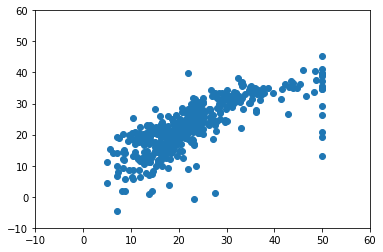

In [32]:
predictions = cross_val_predict(Ridge(alpha=0.51), X, y)
plt.scatter(y, predictions ,linewidths=1)
plt.xlim(-10, 60)
plt.ylim(-10, 60)
w = Ridge(alpha=0.51).fit(X, y)
# plt.plot(X, w[0]+w[1]*X, c='red')

In [33]:
y_pred = results.predict(X)
print('MAE: %.3f' % metrics.mean_absolute_error(y_pred, y))

MAE: 3.301
